<p style="font-family: Arial; font-size:2.8em;color:darkgoldenrod; text-align:center;"> Nobel Peace Prize </p>

## Introduction
<img src="Nobel_Prize.png" width="200" height="150">
The Nobel Peace Prize is one of the five Nobel Prizes established by Swedish inventor Alfred Nobel in his will in 1895. It is awarded annually to individuals or organizations that have made significant contributions to promoting peace and resolving conflicts through their work in fields such as diplomacy, human rights, and social justice.

The Nobel Peace Prize is awarded by the Norwegian Nobel Committee, which is composed of five members appointed by the Norwegian parliament. The committee considers nominations from a wide range of individuals and organizations, including former laureates, government officials, academics, and members of the public. The committee then selects the winner(s) through a series of deliberations, with the award being announced in October of each year.

In [1]:
# import libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

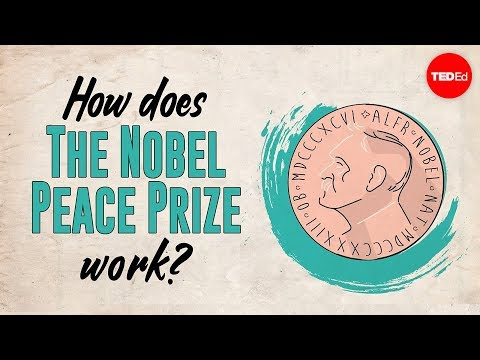

In [2]:
from IPython.display import YouTubeVideo

#embed a YouTube video
YouTubeVideo('rXhpK_lhonA', width=600, height=300)

In [3]:
nobel = pd.read_csv('Nobel Prize Winners.csv')
nobel.head()

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44


In [4]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   firstname              923 non-null    object
 1   surname                921 non-null    object
 2   born_country_code      923 non-null    object
 3   died_country_code      617 non-null    object
 4   gender                 923 non-null    object
 5   year                   923 non-null    int64 
 6   category               923 non-null    object
 7   share                  923 non-null    int64 
 8   name_of_university     697 non-null    object
 9   city_of_university     692 non-null    object
 10  country_of_university  693 non-null    object
 11  born_month             923 non-null    object
 12  age                    923 non-null    int64 
 13  age_get_prize          923 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.1+ KB


In [5]:
nobel.describe()

,year,share,age,age_get_prize
count,923.000000,923.000000,923.000000,923.000000
mean,1971.102925,2.020585,79.346696,59.823402
std,33.606425,0.943415,11.134606,12.571109
min,1901.000000,1.000000,23.000000,17.000000
25%,1947.000000,1.000000,73.000000,51.000000
50%,1977.000000,2.000000,80.000000,60.000000
75%,2000.000000,3.000000,87.500000,69.000000
max,2019.000000,4.000000,103.000000,97.000000


In [6]:
nobel.isnull().sum()

firstname                  0
surname                    2
born_country_code          0
died_country_code        306
gender                     0
year                       0
category                   0
share                      0
name_of_university       226
city_of_university       231
country_of_university    230
born_month                 0
age                        0
age_get_prize              0
dtype: int64

In [7]:
#1st 3 women to win
fem = nobel[nobel.gender == 'female'].nsmallest(3, 'year')
fem[['firstname','surname','year','category','age_get_prize']]

,firstname,surname,year,category,age_get_prize
5,Marie,Curie,1903,physics,36
465,Bertha,von Suttner,1905,peace,62
555,Selma,Lagerlöf,1909,literature,51


In [8]:
#youngest person to win
youngest = nobel.nsmallest(1, 'age_get_prize', keep='all')
youngest[['firstname','surname','year','category','age_get_prize']]

,firstname,surname,year,category,age_get_prize
862,Malala,Yousafzai,2014,peace,17


In [9]:
#oldest person to win
oldest = nobel.nlargest(1, 'age_get_prize', keep='all')
oldest[['firstname','surname','year','category','age_get_prize']]

,firstname,surname,year,category,age_get_prize
914,John,Goodenough,2019,chemistry,97


In [10]:
#winners that won more then ones
won_more_than_one = nobel[nobel.duplicated(subset=['firstname','surname'], keep= False)]\
[["firstname","surname","gender","year", "age_get_prize","category","born_country_code"]].reset_index(drop=True)
won_more_than_one

,firstname,surname,gender,year,age_get_prize,category,born_country_code
0,Marie,Curie,female,1903,36,physics,PL
1,Marie,Curie,female,1911,44,chemistry,PL
2,John,Bardeen,male,1956,48,physics,US
3,John,Bardeen,male,1972,64,physics,US
4,Linus,Pauling,male,1962,61,peace,US
5,Linus,Pauling,male,1954,53,chemistry,US
6,Frederick,Sanger,male,1958,40,chemistry,GB
7,Frederick,Sanger,male,1980,62,chemistry,GB


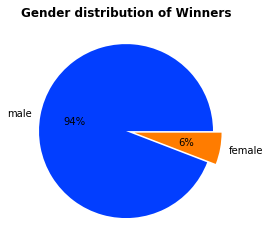

In [11]:
#gender distribution of winners
gen = nobel['gender'].value_counts()

#plot chart
colors = sns.color_palette('bright')
explode = [0,0.1]
gen.plot(kind = 'pie',
        label = '',
        colors = colors, explode = explode,
        autopct='%.0f%%')
plt.title('Gender distribution of Winners', fontweight = 'bold', fontsize=12);

In [12]:
nat = nobel['born_country_code'].value_counts()[:10]
nat

US    274
GB    103
DE     82
FR     56
SE     29
PL     28
JP     27
RU     26
CA     20
IT     19
Name: born_country_code, dtype: int64

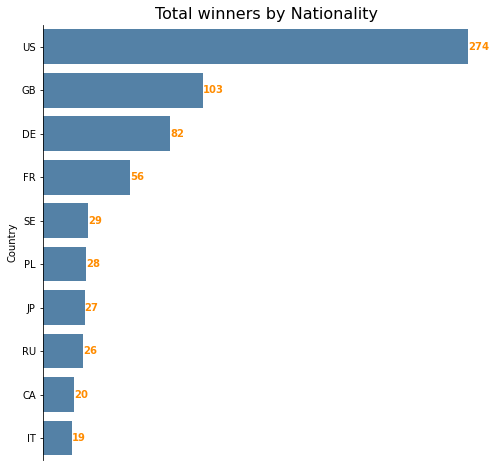

In [13]:
#nationality distribution
nat = nobel['born_country_code'].value_counts()[:10]

fig, ax = plt.subplots(figsize=(8,8))

fig = sns.barplot(y=nat.index, x=nat.values, orient='h', color='steelblue')
plt.title('Total winners by Nationality', fontsize=16)
plt.xlabel('Total winners')
plt.ylabel('Country')

ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)

ax.bar_label(fig.containers[0], fontweight = 'bold', color='darkorange');

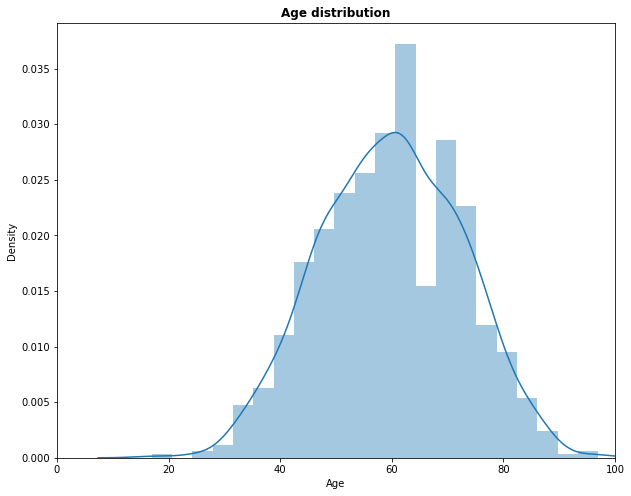

In [14]:
#age distribution when the winners got the prize
plt.figure(figsize=(10,8))
sns.distplot(nobel['age_get_prize'])
plt.xlim(0,100)
plt.xlabel('Age')
plt.title('Age distribution',fontweight = 'bold')
plt.show()

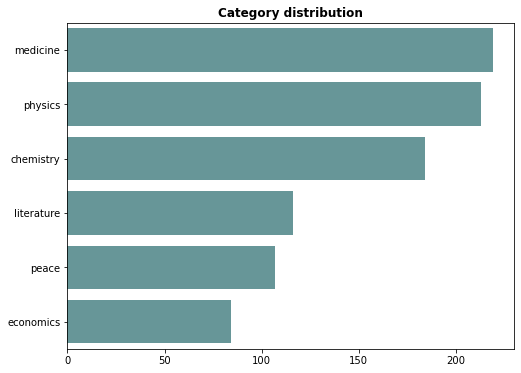

In [15]:
#category distributiond
cat = nobel['category'].value_counts()

fig, ax = plt.subplots(figsize=(8,6))

fig = sns.barplot(x=cat.values, y=cat.index, color='cadetblue')
plt.title('Category distribution', fontweight = 'bold');

In [16]:
nobel.sample(5)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
228,Giulio,Natta,IT,IT,male,1963,chemistry,2,Institute of Technology,Milan,Italy,Feb,76,60
808,Konstantin,Novoselov,RU,NaN,male,2010,physics,2,University of Manchester,Manchester,United Kingdom,Aug,46,36
85,Julian,Schwinger,US,US,male,1965,physics,3,Harvard University,Cambridge MA,USA,Feb,76,47
507,Philip,Noel-Baker,GB,GB,male,1959,peace,1,NaN,NaN,NaN,Nov,93,70
278,George A.,Olah,HU,US,male,1994,chemistry,1,University of Southern California,Los Angeles CA,USA,May,90,67


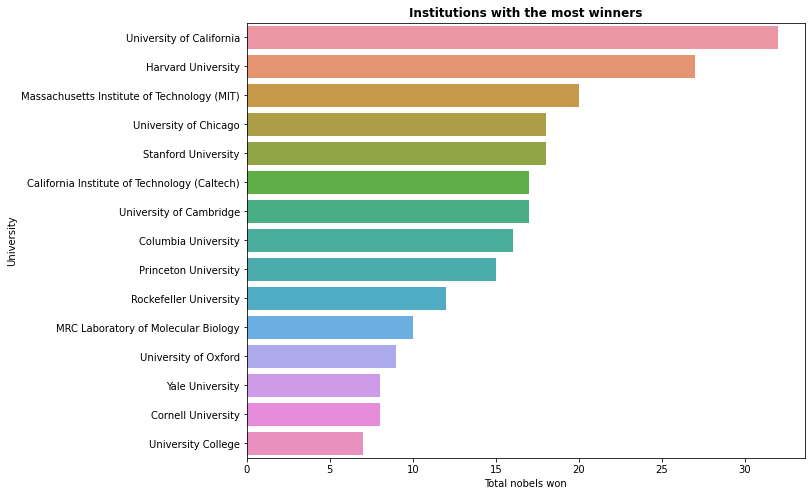

In [17]:
org = nobel['name_of_university'].value_counts().reset_index().head(15)
plt.figure(figsize=[10,8])
sns.barplot(x='name_of_university',y='index',data=org)
plt.ylabel('University')
plt.xlabel('Total nobels won')
plt.title('Institutions with the most winners', fontweight = 'bold')
plt.show();

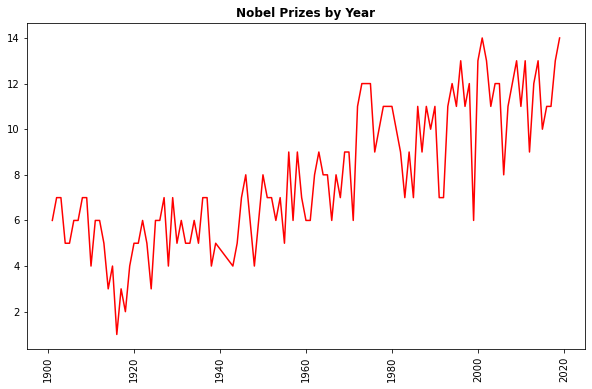

In [18]:
year=nobel['year'].value_counts()

fig, ax = plt.subplots(figsize=(10,6))

fig = sns.lineplot(x=year.index,y=year.values,color='red')

plt.xticks(rotation=90)
plt.title('Nobel Prizes by Year', fontweight = 'bold')
plt.show()

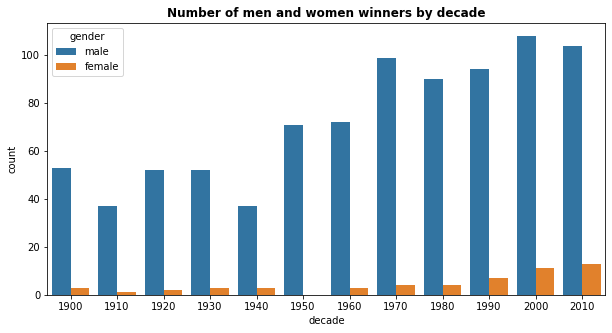

In [19]:
nobel['decade'] = (nobel.year / 10).astype(int) * 10

#Gender distribution by decade
plt.figure(figsize=[10,5])

sns.countplot(data=nobel,x='decade',hue='gender')
plt.title('Number of men and women winners by decade', fontweight = 'bold');

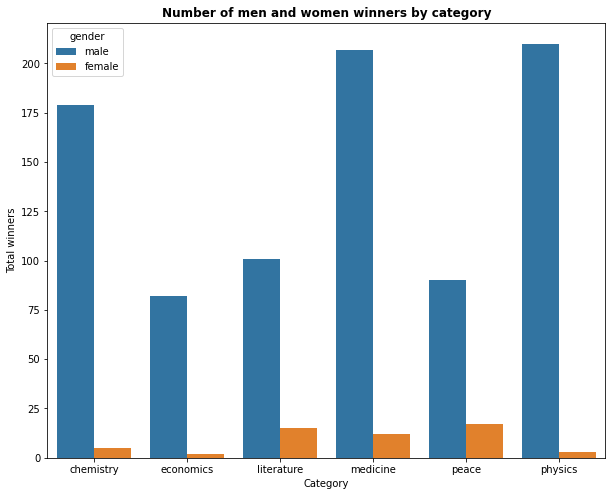

In [20]:
catgen = nobel.groupby('category')['gender'].value_counts().to_frame()
catgen.columns = ['Total winners']
catgen.reset_index(inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x = 'category' , y = 'Total winners' , hue = 'gender' ,data = catgen)
plt.xlabel('Category')
plt.ylabel('Total winners')
plt.title('Number of men and women winners by category', fontweight = 'bold')
plt.show();

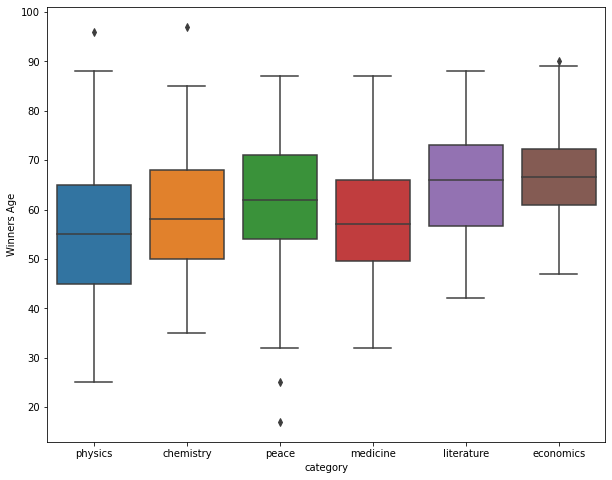

In [21]:
#age distribution when the winners got the prize by category
plt.figure(figsize=[10,8])
sns.boxplot(data=nobel,x='category',y='age_get_prize')
plt.ylabel('Winners Age')
plt.show();